In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from astropy.io import fits
from astropy.table import Table
import os

os.chdir("/Users/keith/astr/research_astr/summer-roman-project/4) FOV0_sims/fits")

In [28]:
file = fits.open("GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits")
data = file[1].data
file.close()

tbl = Table.read("cat_GRS_FOV0_roll0_dx0_dy0_SCA1_direct_final.fits.detect.cat", format="ascii.ecsv")
tbl

id,x_flt,y_flt,mag_approx,segment_flux,mag,hlss_id,distance,z,MODIMAGE,SED,A_IMAGE,B_IMAGE,THETA_IMAGE
int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str24,float64,float64,float64
1,452.9979623629072,3.247675017112318,28.186952511958093,24.614461302757263,23.02,50062.0,1.7134610628395497,0.797619,0,SED:rest:gal.50062.fits,2.0978,1.3697,10.63
2,673.5139473486138,1.4119789793897237,30.007727679330188,4.60129702091217,24.92,182433.0,1.9172914364548528,2.433581,0,SED:rest:gal.182433.fits,0.6521,0.5023,291.77
3,1340.656287513002,0.8983934232837568,31.54133345296451,1.120567336678505,25.38,90921.0,1.20813674276025,1.452288,0,SED:rest:gal.90921.fits,2.226,2.2198,8.13
4,1806.1958557338885,18.439843922059136,20.68447516149802,24670.688835680485,15.5,197468.0,1.032319104259573,0.0,1,SED:rest:gal.197363.fits,8.0,8.0,0.0
5,2206.3481758173316,2.7116602733847306,29.828517966076042,5.427054136991501,24.66,138104.0,2.044515990981615,2.631368,0,SED:rest:gal.138104.fits,1.3724,1.3567,327.84
6,2226.567046023598,6.783446964825549,26.054786613298994,175.41094771027565,20.93,63949.0,1.6920798664275103,0.91206,0,SED:rest:gal.63949.fits,3.1602,2.6354,153.31
7,2284.8707759263943,1.8715168830257563,27.17093003476304,62.747918874025345,21.98,97979.0,1.4051081632037166,2.44571,0,SED:rest:gal.97979.fits,1.5032,1.3877,255.96
8,2294.885287113277,1.392538217335869,28.293967446669804,22.304082438349724,23.05,97974.0,1.101842533400332,2.4456,0,SED:rest:gal.97974.fits,1.2521,0.3867,351.31
9,2981.7449036945054,3.132405867568146,25.908751832149303,200.66452778875828,20.5,199024.0,1.035721534593171,0.0,1,SED:rest:gal.197363.fits,8.0,8.0,0.0


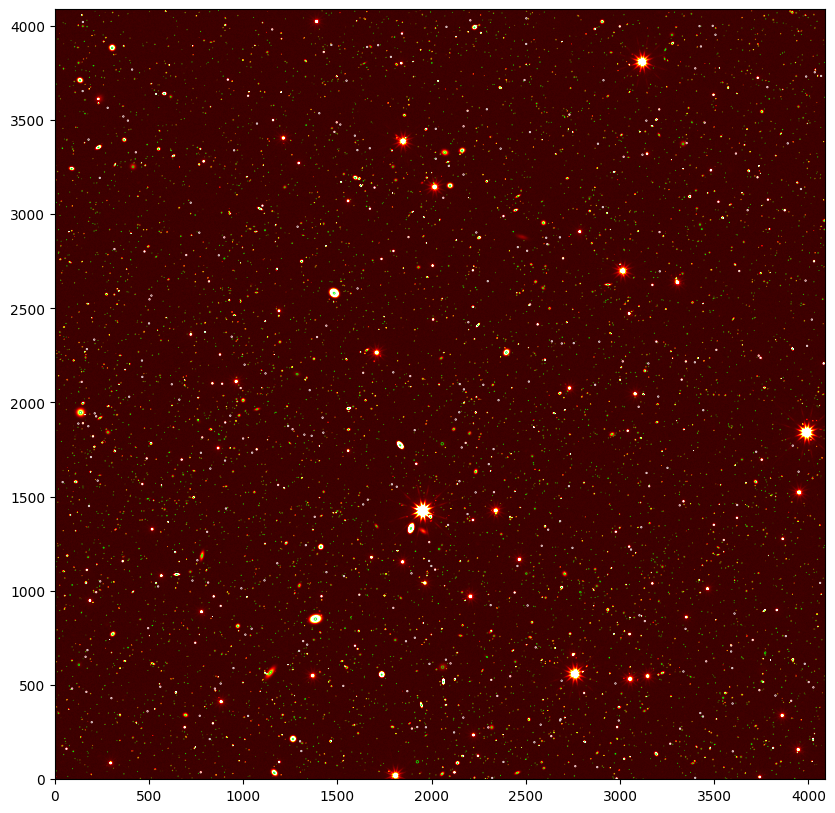

In [40]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(data, origin='lower', cmap='hot', vmin=0.0638298, vmax=2.48141)

for object in tbl:
    x = object['x_flt']
    y = object['y_flt']
    width = object['B_IMAGE']
    height = object['A_IMAGE']
    angle = object['THETA_IMAGE']

    if object["MODIMAGE"]:
        color='white'
    else:
        color='lime'
    

    patch = patches.Ellipse((x,y), width, height, angle=angle, fill=False, color=color, linewidth=0.5)
    ax.add_patch(patch)